# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw1 03_Assignment_1.ipynb`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename=03_Assignment_1.ipynb
local_scp_filepath=~/git/iaml2017/${filename}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} ${UUN}@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} ${UUN}@${server_address}:${filename}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw1 03_Assignment_1.ipynb
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [396]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
%matplotlib inline

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the 520 words out of 61,000 that had highest mutual information. Therefore, our dataset is a $N \times 520$ dimensional matrix, where $N$ is the number of documents. For very sophisticated technical reasons 1 was added to all the word counts in part A. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

## 1. Exploration of the dataset [40%]

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [5 marks] ==========
Load the datasets `train_20news_partA.csv` and `train_20news_partB.csv` into two separate pandas DataFrames.

In [397]:
news_partA_path = os.path.join(os.getcwd(), 'datasets', 'train_20news_partA.csv')
news_partA_data = pd.read_csv(news_partA_path)
news_partB_path = os.path.join(os.getcwd(), 'datasets', 'train_20news_partB.csv')
news_partB_data = pd.read_csv(news_partA_path)

### ========== Question 1.2 --- [3 marks] ==========
Display basic information for dataset A such as number of columns, type, and memory usage (*hint: pandas dataframes have a built in method for this*) 

In [398]:
# long variables names - pure CS grad, java-esque
news_partA_data.info()

# 3 marks just for this?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


### ========== Question 1.3 --- [3 marks] ==========
How many data points and how many attributes are there in the dataset that we can use to model the target variable `class`?

As there are 521 columns and the final column is the target variable *class* - there are **520 attributes** that we can use to model the target variable *class*.

Since there are 2129 entries (rows), we have 2129 instances that provide numerical values for each attribute. This indicates that there are **2129 data points**. The .info() function takes into account that the first row within the CSV datafile are column headings.

*The reason why these entries are listed as 0 to 2256 when calling .info() on the DataFrame is because the value of the first entry of the first attribute (w1_aaa) within the DataFrame takes on the value zero and the final entry takes on the value 2256.*

### ========== Question 1.4 --- [3 marks] ==========
Use a Pandas method to display the summary statistics for the `news_A` DataFrame.

In [399]:
news_partA_data.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


### ========== Question 1.5 --- [3 marks] ==========
Display the first 7 instances of dataset A.

In [400]:
news_partA_data.head(7)

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1


### ========== Question 1.6 --- [5 marks] ==========
Display the names of the first 100 attributes in dataset A. 

You might observe that each attribute consists of two parts:
1. `w<x>_` (where x is an index corresponding to each word)
2. the actual name of the word

In [401]:
import string as s

# raw output
news_partA_data.columns.values[0:100]

# printed output
print(news_partA_data.columns.values[0:100])

# formatted output consisting of both attribute word index and name
for attribute_name in news_partA_data.columns.values[0:100]:
    print(s.split(attribute_name,'_',1))

# formatted output that only prints the actual name of the word
for attribute_name in news_partA_data.columns.values[0:100]:
    print(s.split(attribute_name,'_',1)[1])


['w1_aaa' 'w2_pins' 'w3_kmr' 'w4_notion' 'w5_queens' 'w6_dwyer'
 'w7_defenseman' 'w8_gld' 'w9_tocchet' 'w10_home' 'w11_buying'
 'w12_internet' 'w13_slots' 'w14_compatible' 'w15_transfer' 'w16_baltimore'
 'w17_mean' 'w18_person' 'w19_performance' 'w20_support' 'w21_tor' 'w22_gm'
 'w23_mouse' 'w24_base' 'w25_population' 'w26_bob' 'w27_set' 'w28_it'
 'w29_earth' 'w30_faith' 'w31_steve' 'w32_caps' 'w33_printer' 'w34_east'
 'w35_cable' 'w36_adapter' 'w37_mss' 'w38_catcher' 'w39_bullpen' 'w40_obp'
 'w41_innocent' 'w42_european' 'w43_angeles' 'w44_settings' 'w45_words'
 'w46_rit' 'w47_shots' 'w48_ports' 'w49_vga' 'w50_coverage' 'w51_jumpers'
 'w52_bases' 'w53_sea' 'w54_pts' 'w55_behavior' 'w56_domi' 'w57_sabres'
 'w58_yzerman' 'w59_messier' 'w60_goalies' 'w61_hawks' 'w62_our' 'w63_sx'
 'w64_view' 'w65_hitters' 'w66_richard' 'w67_point' 'w68_nyi' 'w69_mvp'
 'w70_kill' 'w71_nl' 'w72_field' 'w73_connector' 'w74_stars' 'w75_th'
 'w76_install' 'w77_traded' 'w78_configuration' 'w79_standard'
 'w80_

### ========== Question 1.7 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset A. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise.

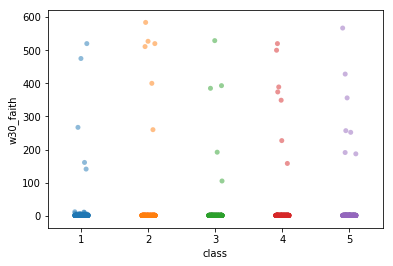

In [402]:
sns.stripplot(x="class", y="w30_faith", data=news_partA_data, jitter=True, alpha=0.5)

### ========== Question 1.8 --- [4 marks] ==========
The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of noise into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. 

For this, you will be using the function `scatter_jitter` provided below. This function takes as input two numpy arrays containing the features of interest. Pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2.

In [403]:
def scatter_jitter(arr1, arr2, jitter=0.2):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    arr1 = arr1 + jitter*arr1.std(axis=0)*np.random.standard_normal(arr1.shape)
    arr2 = arr2 + jitter*arr2.std(axis=0)*np.random.standard_normal(arr2.shape)
    plt.scatter(arr1, arr2, marker=4)

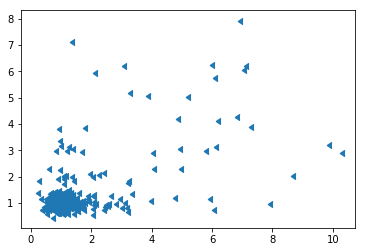

In [404]:
feature_one = news_partA_data.iloc[124]
feature_two = news_partA_data.iloc[248]
scatter_jitter(feature_one, feature_two)

# Ideally I would like a new plot for each value between 0.1 and 1
# Come back to this if there is time..
# for i in map(lambda x: x/10.0, range(1,10,1)):
#    scatter_jitter(feature_one, feature_two, i)

### ========== Question 1.9 --- [7 marks] ==========
From the strip and scatter plots above you might observe that there is something peculiar about the data. Indeed most attributes take very small values (usually in the range 1-10) but there are some data points (i.e. rows) in the dataset where the attributes take very large values. These data points are called [outliers](https://en.wikipedia.org/wiki/Outlier).

You might think that the presence of outliers in the dataset has been a resut of noise contamination (you wouldn't expect the same word to appear 600 times within an e-mail, would you?). Your job now is to create a new dataset from dataset A (name it `news_A_clean`) and remove the outliers. Create some metric to find the outliers and check that your metric is reasonable. Be careful not to alter the original `news_A`...we may require it in its dirty format later...

In [405]:
from statsmodels import robust

# Initially, looking at the data in Excel or a text editor can give you a good indication of outliers
# furthermore, examining the mean and the standard deviation of each row will also give you a fairly good indication:

# Uncomment this block to see the mean and standard deviation for all data points

'''
for x in xrange(0, len(news_partA_data)):
   print("Row: ", x, " .. ", news_partA_data.iloc[x].mean(), news_partA_data.iloc[x].std())
'''

# Ideally, we should be able to say: 'when the standard deviation exceeds a certain threshold, that row is an outlier'

'''
for x in xrange(0, len(news_partA_data)):
    threshold = 10
    if (news_partA_data.iloc[x].std() > 10):
        print("row: ", x)
'''

# I'm currently setting the threshold as 7 by default and then visually comparing agaisnt the actual data to test 
# to see if this is a clean dataset. If I have time I will return to this question and try and follow up with a metric.
# I have listed some ideas at the bottom, but I found this question quite difficult.

# I REALLY don't like exceeding three levels of indentation..

# UPDATE: best value of 't' - threshold is 3, see below
def cleanDataFrame(df, threshold=7, print_on_itr=True):
    rows_to_be_dropped = []
    for index in xrange(0, len(df)):
        if (print_on_itr and df.iloc[index].std() > threshold):
            print("Row to be dropped: ", index)
            rows_to_be_dropped.append(index)
        elif (df.iloc[index].std() > threshold):
            rows_to_be_dropped.append(index)

    if (print_on_itr):
        print("total rows to be dropped: ", len(rows_to_be_dropped))
    
    return df.drop(df.index[rows_to_be_dropped])

# UPDATE: I came back to this question when running the classifier later in the exercise and performed a sensitivity 
# analysis, essentially observing how modifying t affected the accuracy of the classifer. I found that 3 was the
# optimal value to set the threshold at, it provided 89% accuracy on the training set.

clean_partA_data = cleanDataFrame(news_partA_data, threshold=3, print_on_itr=False)

# NOTE: I spent quite a long time on this question. Would very much appriciate some feedback.

# Exporting to view visually.
clean_partA_path = os.path.join(os.getcwd(), 'datasets', 'clean_news_partA.tsv')
clean_partA_data.to_csv(clean_partA_path, '\t')




# Thoughts for some kind of metric:

# checking the describe of the resultant 'clean' set agaisnt the original
clean_partA_data.describe()

# checking the mean and standard deviation of each datapoint agaisnt the original

#for x in xrange(0, len(clean_partA_data)):
#   print("Row: ", x, " .. ", clean_partA_data.iloc[x].mean(), clean_partA_data.iloc[x].std())

# It may be sensible to do some kind of sensitivity analysis of the value of the threshold?

# This could be done by completing the classifier in the next section and then checking it's accuracy by modifying
# the threshold value of the cleanDataFrame function. In this respect, this function threshold can be thought of
# as a hyperparameter that requires tuning.

# if there's time look into: MAD and ICQ methods
#(abs(news_partA_data[0:100] - news_partA_data[0:100].median())) / robust.mad(news_partA_data[0:100])

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,...,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000
mean,1.025530,1.014451,1.014933,1.007225,1.006262,1.010597,1.013487,1.024566,1.012524,1.070328,...,4.576108,4.475434,4.536609,4.569846,4.536127,4.517341,4.516378,4.521676,4.412331,3.100674
std,0.280831,0.157643,0.173604,0.105034,0.078904,0.134911,0.190904,0.275722,0.154724,0.317924,...,2.284466,2.273763,2.329922,2.291826,2.332617,2.253605,2.289467,2.300343,2.296256,1.390494
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.750000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,4.000000
max,8.000000,5.000000,5.000000,4.000000,2.000000,4.000000,7.000000,5.000000,4.000000,4.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,5.000000


### ========== Question 1.10 --- [3 marks] ==========
Write code to return the number of data points in the clean dataset, and the number of documents that have been excluded as outliers

In [406]:
clean_data_points_length = len(clean_partA_data)
dirty_data_points_length = len(news_partA_data)
number_of_outliers = dirty_data_points_length - clean_data_points_length
print("Number of clean data points: ", clean_data_points_length)
print("Number of excluded documents (outliers): ", number_of_outliers)

Number of clean data points:  2076
Number of excluded documents (outliers):  53


## 2. Naive Bayes classification [60%]
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset A. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [4 marks] ==========

By using the `scatter_jitter` function provided above, display a scatter plot of the features `w281_ico` and `w273_tek` for the cleaned dataset A. Set the jitter value to something small (e.g. 0.1). Label axes appropriately.

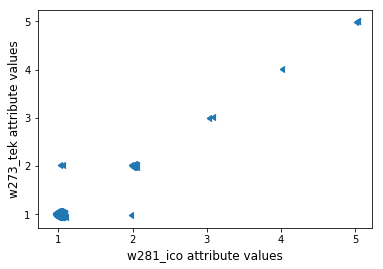

In [407]:
feature_one = clean_partA_data["w281_ico"]
feature_two = clean_partA_data["w273_tek"]
scatter_jitter(feature_one, feature_two, jitter=0.1)
plt.xlabel('w281_ico attribute values', fontsize=12)
plt.ylabel('w273_tek attribute values', fontsize=12)

### ========== Question 2.2 --- [6 marks] ==========
What do you observe? 

How does that relate to the Naive Bayes assumption? 

What would be the main issue we would have to face if we didn't make this assumption?

The words **'ico' (w281) and 'tek' (w273) appear mainly in documents one and two**. There are about the same number of occurances in document three and five, with minimal occurances in document four.

The Naive Bayes assumption states that all classes are **conditionally independent**, which is to say that words (attributes) are not characterised as being in anyway similar to one another, for any class. In this instance, **the words 'ico' and 'tek' actually do have some similarity.** This claim can be made because the above visualisation demonstrates that both words occur mostly in documents of type 1 and 2, thereby refuting the assumption made by the Naive Bayes classifier.

The main issue encountered if this assumption is not made is that the model would have to take into consideration the similarity between words and represent these similarities as attributes, or some kind of model state. This would mean: if we had 5 classes and 520 features, there would be 5^520 different possible combinations - which is **completely infeasible to model**, there would not be data available to cover all possible combinations for training the model and there would likely not be sufficient compute and or storage available.


### ========== Question 2.3 --- [5 marks] ==========
Fit a Gaussian Naive Bayes model to the cleaned dataset A. Your input features should be all the attributes in the dataset except the `class` attribute which will be your target. Display the classification accuracy on the training dataset.

In [408]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

# number of data points
row_index_length = len(clean_partA_data)
# number of input features, -1 because the final column is class
column_index_length = len(clean_partA_data.columns) - 1

def getColumnNames(df, final_column_index):
    column_names = []
    for attribute_name in df.columns.values[0:final_column_index]:
        column_names.append(attribute_name)
    return column_names

column_names = getColumnNames(clean_partA_data, column_index_length)

input_features = clean_partA_data[:][column_names]

targets = clean_partA_data[:]['class']

clf.fit(input_features, targets)

mean_classification_accuracy = clf.score(input_features, targets)

print("Mean classification accuracy on TRAINING set (A - CLEAN): ", mean_classification_accuracy)

Mean classification accuracy on TRAINING set (A - CLEAN):  0.890173410405


### ========== Question 2.4 --- [5 marks] ==========
Plot the (normalised) confusion matrix for the training data. Label axes appropriately.

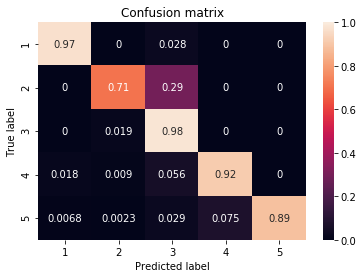

In [409]:
from sklearn.metrics import accuracy_score, confusion_matrix

# using the function from the previous lab
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

clf_predict = clf.predict(input_features)
conf_matrix = confusion_matrix(targets, clf_predict)
conf_matrix_norm = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure()

# classes are 1,2,3,4,5 - you know this by observing the class column in the data
# e.g: print(targets)

plot_confusion_matrix(conf_matrix_norm, classes=[1,2,3,4,5])


### ========== Question 2.5 --- [3 marks] ==========

Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

**Yes the confusion matrix looks like what I would expect.** The reason is because if you add all the values found in the matrix where the predicted labels meet the true label (diagonally down from left to right) up and divide by the number of squares, you get a value very close to classification accuracy. It's a little out due to the occasional misclassification of surrounding labels, mainly 2's being misclassified as 3's.

**(0.97 + 0.71 + 0.98 + 0.92 + 0.89) / 5 = 0.894** 

=> 0.894 ~= 0.89

### ========== Question 2.6 --- [5 marks] ==========
Fit a Gaussian Naive Bayes model to the original dataset A (including the outliers). Display the classification accuracy on the training dataset.

In [410]:
clf_old_data = GaussianNB()

old_row_index_length = len(news_partA_data)
old_column_index_length = len(news_partA_data.columns) - 1

old_column_names = getColumnNames(news_partA_data, old_column_index_length)

old_input_features = news_partA_data[:][old_column_names]

old_targets = news_partA_data[:]['class']

clf_old_data.fit(old_input_features, old_targets)

mean_classification_accuracy_of_old_data = clf_old_data.score(old_input_features, old_targets)

print("Mean classification accuracy on TRAINING set (A - UNCLEAN): ", mean_classification_accuracy_of_old_data)

Mean classification accuracy on TRAINING set (A - UNCLEAN):  0.205260685768


### ========== Question 2.7 --- [4 marks] ==========
Comment on the above results (Questions 2.3 & 2.6). In particular explain why you think that cleaning the data helps in this case.

There is a **huge increase in classification accuracy** with regards to the cleaned dataset as appose to the uncleaned dataset. 

This is because the dataset that contains outliers **skews the model representations for each class**. You could visualise this in 2d space (theoretically - not with this actual model) as the boundary that encloses any particular class. **The clean version would have pretty good model boundaries (representations), whilst the unclean version would likely have boundaries that cross over one another**. Therefore the **probability distribution that provides a prediction** would be **potentially** fairly even across all classes, meaning that the model will be more likely to mispredict (to some degree) any incoming data, as it would be **in a state of confusion / indecisiveness**.

In this particular example, the classification accuracy is so low on the model trained with uncleaned data **because the outliers were particularly large when compared with non-outliers**.

*Apologies, I found it hard to make this answer concise.*


### ========== Question 2.8 --- [5 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). Use the classifier you trained in Question 2.5 (i.e. on the cleaned dataset) and test its performance on dataset `train_20news_partB`. 

Display the (normalized) confusion matrix and the classification accuracy on the Dataset B.

Mean classification accuracy on TESTING set:  0.882104274307


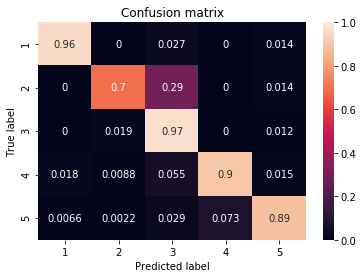

In [411]:
# uns for unseen

uns_row_index_length = len(news_partB_data)
uns_column_index_length = len(news_partB_data.columns) - 1
uns_column_names = getColumnNames(news_partB_data, uns_column_index_length)
uns_input_features = news_partB_data[:][uns_column_names]
uns_targets = news_partB_data[:]['class']

mca_uns_data = clf.score(uns_input_features,uns_targets)
print("Mean classification accuracy on TESTING set: ", mca_uns_data)

clf_uns_predict = clf.predict(uns_input_features)
uns_conf_matrix = confusion_matrix(uns_targets, clf_uns_predict)
uns_conf_matrix_norm = uns_conf_matrix / uns_conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure()

plot_confusion_matrix(uns_conf_matrix_norm, classes=[1,2,3,4,5])


### ========== Question 2.9 --- [4 marks] ==========

Comment on the results from the previous question. Do you think this is an acceptable level of performance? Which are the easiest and most difficult classes to predict correctly? 

Since the classification accuracy on the testing set is almost as good as the accuracy on the training set, **yes this is an acceptable level of performance**. The classifier has the **most trouble misclassifing the true label 2 as the predicted label 3**. I would say it has a *pretty good* performance on all other classes, but the **easiest classes to predict are 1 and 3**.

The classifier may have a slight bias towards predicting 3's, as it misclassifies at least one of every label as a three. This *could* (but doesn't neccesarily) indicate why the prediction accuracy on label 3 is so high.

*(Note: I'm **not too sure** about the point I just made, I believe it's valid - but some feedback would be great, thanks)*

### ========== Question 2.10 --- [4 marks] ==========
What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of and what would its performance be on this dataset?* 

From reviewing the SciKit Learn documentation, I found the 'dummy classifier', which is described as:

"a classifier that makes predictions using simple rules. This classifier is useful as a simple baseline to compare with other (real) classifiers. Do not use it for real problems."

Directly quoted from: http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

My intuition would lead me to believe that it's good to use as a baseline classifier (or at least an initial one) because if the classifier being trained is underperforming in comparison to the dummy classifier, it must be **absolutely terrible**. I would probably use the dummy classifier as an initial test to make sure my classifier at least worked in the most basic sense, but would then probably compare it with something like a decision tree model. 

### ========== Question 2.11 --- [4 marks] ==========

Estimate the baseline performance.

In [412]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier

print("----dummy - BASELINE ----")
dummy = DummyClassifier()
dummy.fit(input_features, targets)
print("dummy performance: (CLEANED DATA)", dummy.score(input_features, targets))
old_dummy = DummyClassifier()
old_dummy.fit(old_input_features, old_targets)
print("dummy performance: (UNCLEANED DATA)", dummy.score(old_input_features, old_targets))
print("dummy performance: (UNSEEN DATA)", dummy.score(uns_input_features, uns_targets))

print("----clf----")

print("clf performance (CLEANED DATA): ", clf.score(input_features, targets))
print("clf performance (UNCLEANED DATA): ", clf_old_data.score(old_input_features, old_targets))
print("clf performance (UNSEEN DATA): ", clf.score(uns_input_features, uns_targets))


----dummy - BASELINE ----
dummy performance: (CLEANED DATA) 0.219171483622
dummy performance: (UNCLEANED DATA) 0.195396899953
dummy performance: (UNSEEN DATA) 0.200563644904
----clf----
clf performance (CLEANED DATA):  0.890173410405
clf performance (UNCLEANED DATA):  0.205260685768
clf performance (UNSEEN DATA):  0.882104274307


### ========== Question 2.12 --- [3 marks] ==========

Execute the cell below to get the prediction on the test dataset by using a different classifier which we will be introducing in this class later on. By using this prediction provided below (`rf_prediction`) plot the confusion matrix and display the classification accuracy on the test dataset. *Important: Make sure the test dataset is loaded in a DataFrame called `news_B` otherwise execution will return an error. In that case replace the DataFrame name in the third line.*

classification accuracy:  0.989196806012


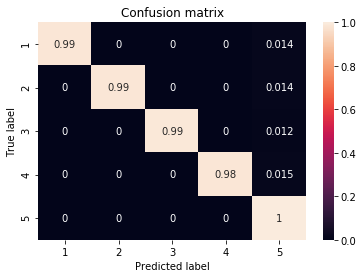

In [413]:
news_A_clean = clean_partA_data
news_B = news_partB_data

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50).fit(X=news_A_clean.drop("class", axis=1), y=news_A_clean["class"])
X_ts = news_B.drop('class', axis=1)
rf_prediction = rf.predict(X=X_ts)

# classification accuracy

targets = news_B[:]['class']
classification_accuracy = accuracy_score(targets, rf_prediction)
print ("classification accuracy: ", classification_accuracy)

# confusion matrix

rf_conf_matrix = confusion_matrix(targets, rf_prediction)
rf_conf_matrix_norm = rf_conf_matrix / rf_conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(rf_conf_matrix_norm, classes=[1,2,3,4,5])

### ========== Question 2.13 --- [8 marks] ==========

Which classifier (Naive Bayes or Random Forest) would you trust if you had to choose? What are the reasons you believe the Gaussian Naive Bayes classifier does not perofm so well in this particular problem? You are not expected to justify the performance level achieved by the Random Forest classifier. Feel free to use code and plots to illustrate your points.

If I had to choose between Naive Bayes or Random Forest, I would choose **Random Forest** based on the **classification accuracy** presented in the previous question. In addition, **the confusion matrix above shows that the Random Forest classifier makes very few mistakes on almost every label**.

I believe the Guassian Naive Bayes classifier does not perform well due to the independence assumption (class conditional independence). As demonstrated in Q2.2, this assumption is easily refuted and opting for a more sophisticated classifier that can model similarities between words (word2vec-esque?) may be advantageous.

Another reason as to why the **Gaussian** Naive Bayes classifier does a poor job for this particular problem is because word counts should not be treated as continuous data. Perhaps something like the Multinomial Naive Bayes classifier would be more suited to this particular type of problem.

The classifier accuracy could *potentially* be improved by using tf-idf weights instead of simple word counts.

In [414]:
# Trying tf-idf weights rather than counts.. Summary: tf-idf doesn't appear to be the way to go with Naive Bayes.
# At least, not with this dataset.

from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)

# pre-processing

clean_data = clean_partA_data
clean_data_row_index_len = len(clean_data)
clean_data_col_index_len = len(clean_data.columns) - 1

tfidf_column_names = getColumnNames(clean_data, clean_data_col_index_len)

tfidf_clean_data = clean_data
tfidf_clean_training_data = tfidf_clean_data.drop("class", axis=1)

tfidf = transformer.fit_transform(tfidf_clean_training_data)

tfidf_normalised_training_data = tfidf.toarray()

tfidf_training_features = tfidf_normalised_training_data

tfidf_training_targets = clean_data[:]['class']

# training

tfidf_clf = GaussianNB()
tfidf_clf.fit(tfidf_training_features, tfidf_training_targets)

# score on training set

training_score = tfidf_clf.score(tfidf_training_features, tfidf_training_targets)

print("tfidf training accuracy: ", training_score)

# testing set - preprocessing

uns_data = news_partB_data
uns_data_row_index_len = len(uns_data)
uns_data_col_index_len = len(uns_data.columns) - 1

tfidf_uns_data = uns_data
tfidf_uns_testing_data = tfidf_uns_data.drop("class", axis=1)

tfidf_testing = transformer.fit_transform(tfidf_uns_testing_data)

tfidf_normalised_testing_data = tfidf_testing.toarray()

tfidf_testing_features = tfidf_normalised_testing_data

tfidf_testing_targets = uns_data[:]['class']

# score on testing set

tfidf_testing_score = tfidf_clf.score(tfidf_testing_features, tfidf_testing_targets)

print("tfidf testing accuracy: ", tfidf_testing_score)

# Well, that was a lot of work for nothing! tf-idf doesn't appear to be as good as just useing standard counts.
# Unless I've missed something..

tfidf training accuracy:  0.848747591522
tfidf testing accuracy:  0.838891498356
